<a href="https://colab.research.google.com/github/paridhi-pandey/ml-basics-day-3/blob/main/MLBasics(DAY_3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing the required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

##Mounting google drive to colab for loading the dataset permanently

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Loading the dataset

In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Mall_Customers.csv')

# Display basic info
print(df.head())
print(df.info())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


##Preprocessing

In [ ]:
# Drop CustomerID
df = df.drop('CustomerID', axis=1)

# Encode Gender
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Selecting relevant features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Optional: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

##Using Elbow method to determine optimal K

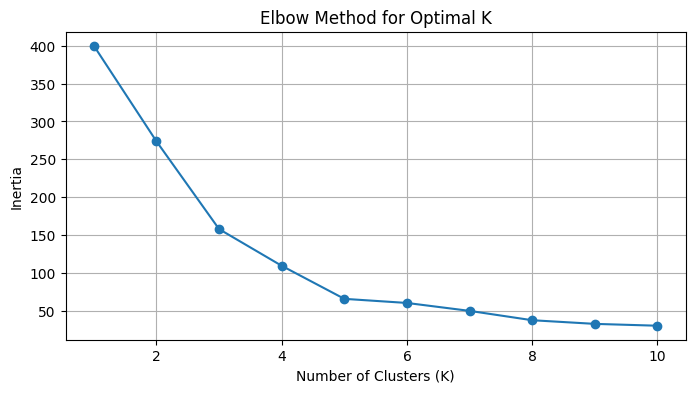

In [ ]:
inertia = []

# Test K from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

##Apply K-Means with optimal K

In [ ]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original DataFrame
df['Cluster'] = clusters

##Visualizing the Clusters

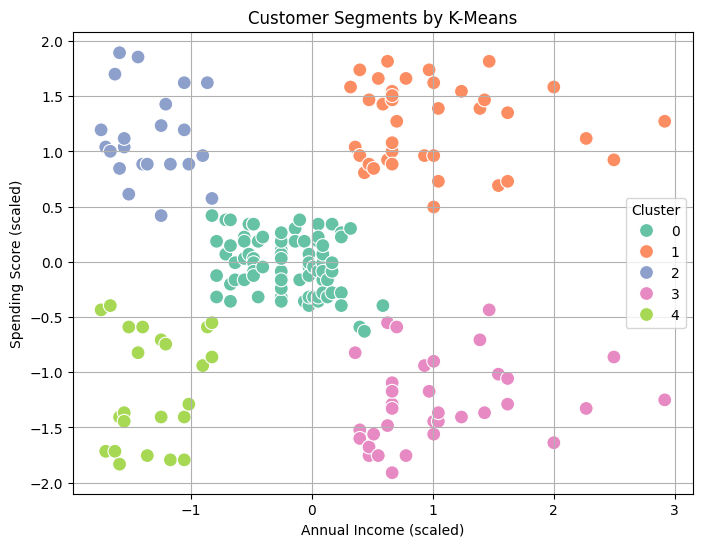

In [ ]:
# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=clusters, palette='Set2', s=100)
plt.title('Customer Segments by K-Means')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

##Interpreting the Clusters

In [ ]:
# View mean values per cluster
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)
print(cluster_summary)

           Gender        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                 
0        0.592593  42.716049           55.296296               49.518519
1        0.538462  32.692308           86.538462               82.128205
2        0.590909  25.272727           25.727273               79.363636
3        0.457143  41.114286           88.200000               17.114286
4        0.608696  45.217391           26.304348               20.913043


##Saving the Clustered Data

In [ ]:
df.to_csv('customer_segments.csv', index=False)

##Importing libraries for Hierarchical Clustering

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

##Creating Dendogram

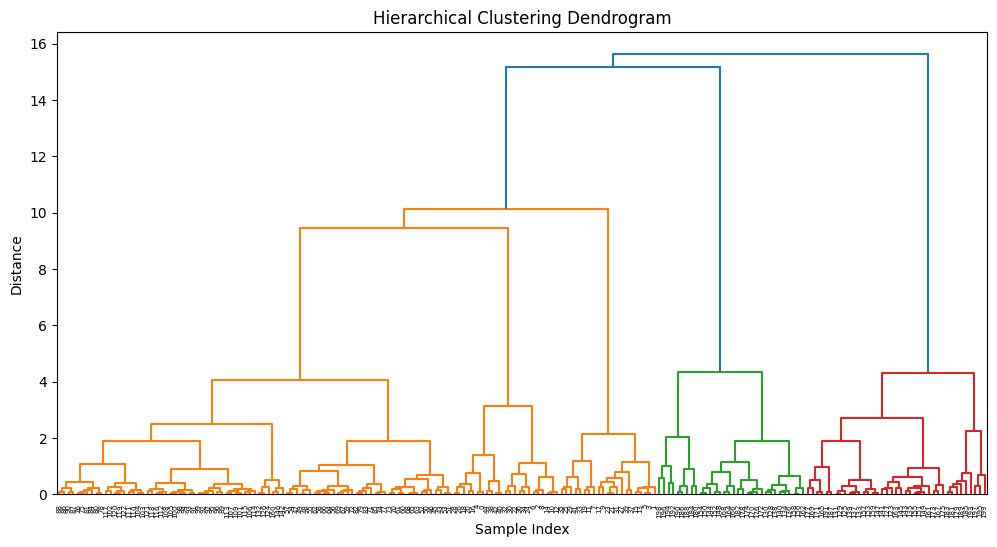

In [ ]:
# Compute linkage matrix (using Ward’s method)
linked = linkage(X_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


##Assigning clusters from Dendogram

In [ ]:
# Form flat clusters: let's say we cut at 5 clusters
h_clusters = fcluster(linked, t=5, criterion='maxclust')

# Add to DataFrame
df['Hierarchical_Cluster'] = h_clusters

##Visualizing Hierarchical Clusters

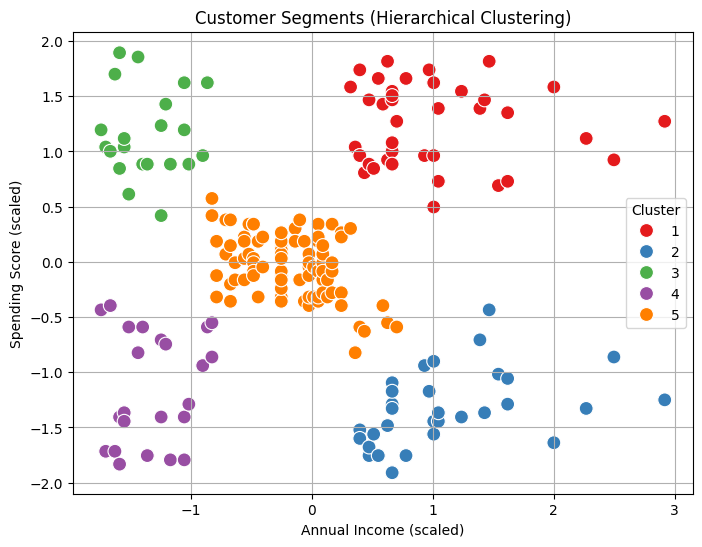

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=h_clusters, palette='Set1', s=100)
plt.title('Customer Segments (Hierarchical Clustering)')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

##Comapring Cluster Insights

In [ ]:
# Mean stats per cluster
print(df.groupby('Hierarchical_Cluster').mean(numeric_only=True))

                        Gender        Age  Annual Income (k$)  \
Hierarchical_Cluster                                            
1                     0.538462  32.692308           86.538462   
2                     0.437500  41.000000           89.406250   
3                     0.571429  25.333333           25.095238   
4                     0.608696  45.217391           26.304348   
5                     0.600000  42.482353           55.811765   

                      Spending Score (1-100)   Cluster  
Hierarchical_Cluster                                    
1                                  82.128205  1.000000  
2                                  15.593750  3.000000  
3                                  80.047619  2.000000  
4                                  20.913043  4.000000  
5                                  49.129412  0.129412  


##Importing PCA

In [ ]:
from sklearn.decomposition import PCA

##Applying PCA

In [ ]:
# Apply PCA to scaled data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA components to DataFrame
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

## Visualizing PCA-reduced Clusters (from K-Means)

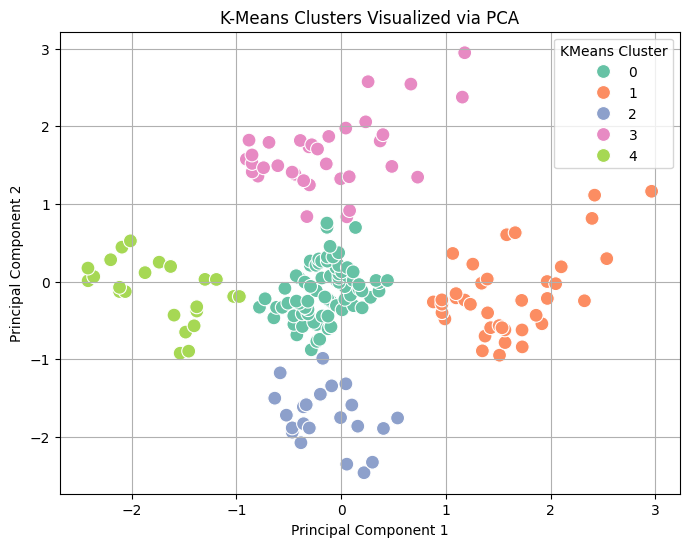

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100)
plt.title('K-Means Clusters Visualized via PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.legend(title='KMeans Cluster')
plt.show()

## Visualizing PCA-reduced Hierarchical Clusters

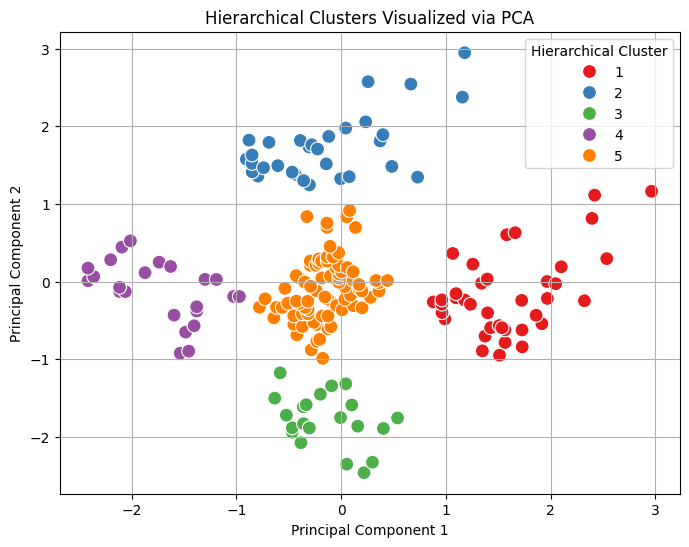

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Hierarchical_Cluster', palette='Set1', s=100)
plt.title('Hierarchical Clusters Visualized via PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.legend(title='Hierarchical Cluster')
plt.show()